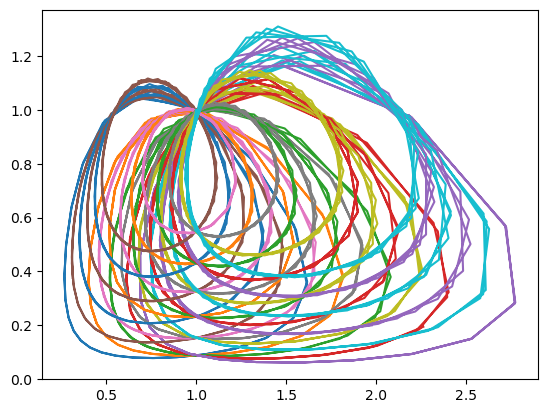

In [1]:

from scipy.integrate import odeint as odeint_scipy
import os
import shutil
import numpy as np
import pandas as pd
from threading import Thread
import matplotlib.pyplot as plt

def dpredprey(t, u, a, b, c, d):
    dudt = np.zeros_like(u)

    dudt[0] = a*u[0] - b*u[0]*u[1]
    dudt[1] = -c*u[1] + d*b*u[0]*u[1]

    return dudt

def run_predprey(a = 2/3, b = 4/3, c = 1.0, d = 1.0):
    nt = 50
    T = 20.0
    t = np.linspace(0, T, nt)

    u0 = np.ones((2,))

    odefunc = lambda u_, t_: dpredprey(t_, u_, a, b, c, d)
    
    ut = odeint_scipy(odefunc, u0, t)

    return ut

def generate_dataset():
    if os.path.exists('predprey_data'):
        shutil.rmtree('predprey_data')
    if os.path.exists('predprey_params.csv'):
        os.remove('predprey_params.csv')
    os.mkdir('predprey_data')
    
    param_list = []
    a = np.linspace(0.5, 1, 6)
    c = np.linspace(1, 2, 5)
    for ai in a:
        for ci in c:
            param_list.append([ai, ci])
            ut = run_predprey(a = ai, c = ci)
            plt.plot(ut[:,0], ut[:,1])

            df = pd.DataFrame(ut)
            df.to_csv(f'predprey_data/{ai:0.3f}_{ci:0.3f}.csv', header=False, index=False)
    pd.DataFrame(param_list, columns=['a', 'c']).to_csv('predprey_params.csv', index=False)

if __name__ == '__main__':
    generate_dataset()